In [1]:
import mne
import matplotlib as plt
from mne.minimum_norm import compute_source_psd, read_inverse_operator
%matplotlib inline


In [2]:
from mne_connectivity import spectral_connectivity_epochs

/Users/anshulchiranth/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from mne_connectivity import spectral_connectivity_time
from mne_connectivity.viz import plot_sensors_connectivity

In [4]:
import statistics

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_path = '/Users/anshulchiranth/mne_data/MNE-sample-data'
meg_path = f'{data_path}/MEG/sample'
raw_fname = f'{meg_path}/sample_audvis_raw.fif'
fname_inv = f'{meg_path}/sample_audvis-meg-oct-6-meg-inv.fif'
fname_label = f'{meg_path}/labels/Aud-lh.label'

In [7]:
raw = mne.io.read_raw_fif(raw_fname)

Opening raw data file /Users/anshulchiranth/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [8]:
label = mne.read_label(fname_label)

Using matplotlib as 2D backend.


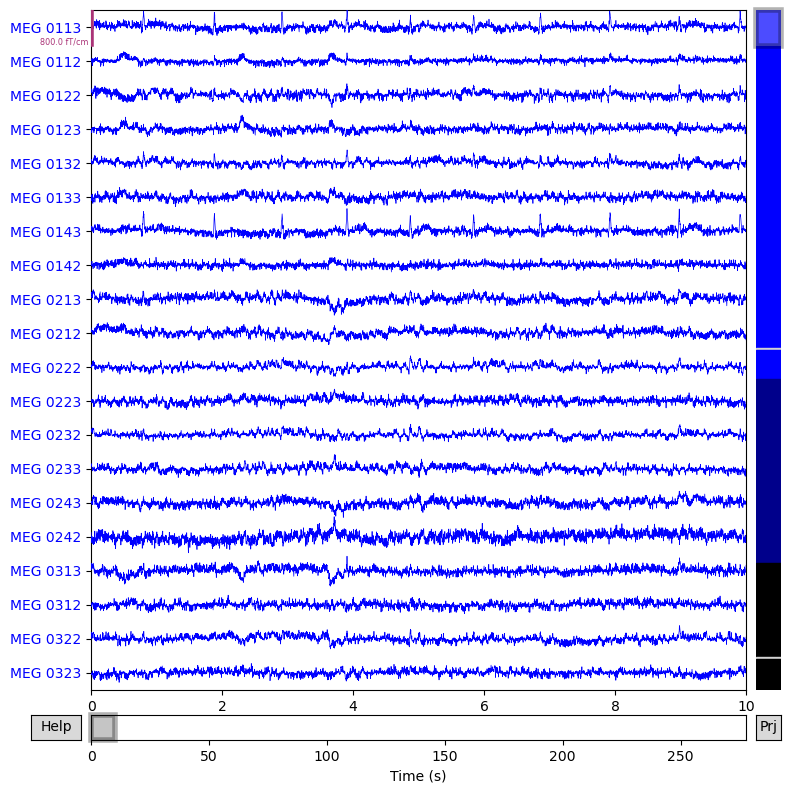

In [9]:
#All channels
raw.plot();

In [10]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [11]:
raw_selected = raw.copy().pick(picks="eeg",exclude="bads")

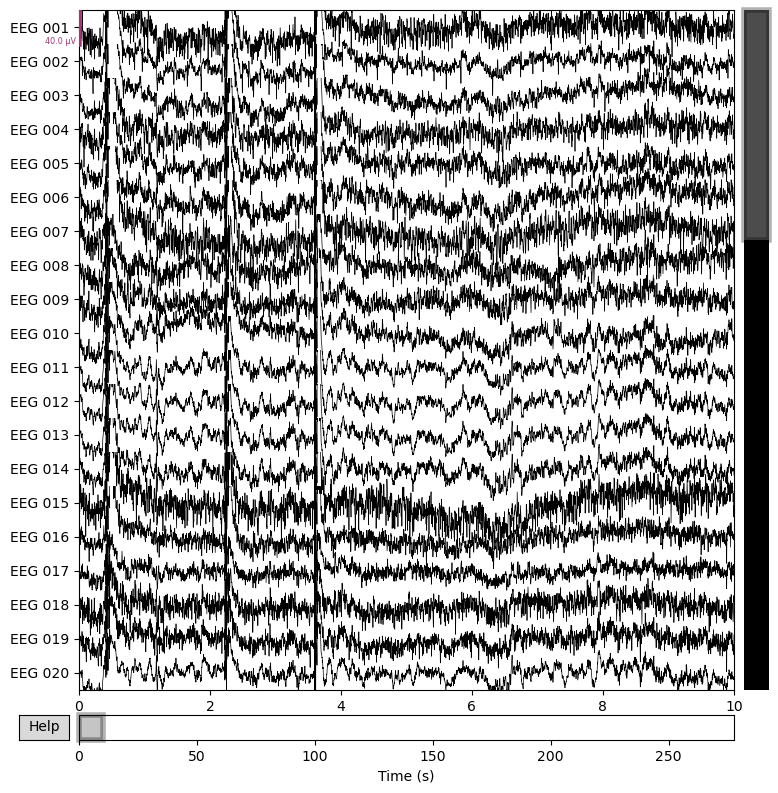

In [12]:
raw_selected.plot();

In [13]:
raw_selected.info

<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>

In [14]:
type(raw_selected)

mne.io.fiff.raw.Raw

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/anshulchiranth/anaconda3/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


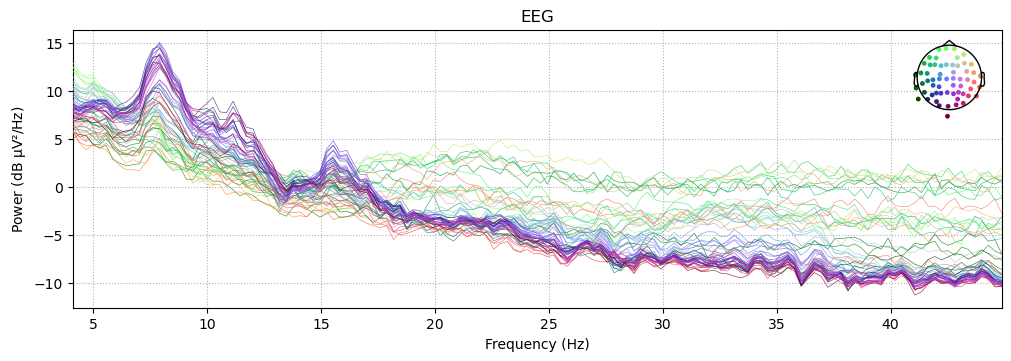

In [15]:
raw_selected.compute_psd(fmin=4,fmax=45).plot();

In [16]:
theta = raw_selected.compute_psd(fmin=4,fmax=7)
alpha = raw_selected.compute_psd(fmin=8,fmax=12)
beta = raw_selected.compute_psd(fmin=13,fmax=30)
gamma = raw_selected.compute_psd(fmin=31,fmax=45)
theta

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,59
Number of frequency bins,10
Frequency range,4.11 – 6.75 Hz


In [47]:
type(theta)

mne.time_frequency.spectrum.Spectrum

In [17]:
theta.get_data()

array([[1.63407773e-11, 1.37384569e-11, 1.23108039e-11, 1.18326554e-11,
        9.01448246e-12, 7.27862127e-12, 6.44696321e-12, 5.73783780e-12,
        6.10522556e-12, 5.90112551e-12],
       [1.80054870e-11, 1.48078487e-11, 1.37308547e-11, 1.37651739e-11,
        1.06711668e-11, 8.44464607e-12, 7.78795354e-12, 6.76182549e-12,
        6.61568692e-12, 6.71808515e-12],
       [2.00078821e-11, 1.57865521e-11, 1.43287491e-11, 1.49887265e-11,
        1.19781223e-11, 9.45932428e-12, 8.52461391e-12, 7.28695754e-12,
        6.71700446e-12, 7.00135021e-12],
       [8.87801408e-12, 7.88727370e-12, 7.14936541e-12, 6.28062264e-12,
        4.65649996e-12, 4.47781209e-12, 3.58090676e-12, 3.11590931e-12,
        3.49348520e-12, 3.58296658e-12],
       [1.13795290e-11, 1.00016897e-11, 9.33569610e-12, 9.70692574e-12,
        7.94016534e-12, 6.82809877e-12, 5.87998612e-12, 5.04637199e-12,
        5.42846594e-12, 5.35861258e-12],
       [1.43606461e-11, 1.11620425e-11, 1.05042259e-11, 1.25725041e-11,
   

In [18]:
theta_means = []

for data_list in theta.get_data():
    mean = statistics.mean(data_list)
    theta_means.append(mean)


theta_series = pd.Series(theta_means)
theta_series

0     9.470695e-12
1     1.073087e-11
2     1.160793e-11
3     5.310286e-12
4     7.690554e-12
5     9.599045e-12
6     9.792577e-12
7     3.847917e-12
8     5.331167e-12
9     7.163885e-12
10    8.769735e-12
11    9.901832e-12
12    9.570007e-12
13    8.796178e-12
14    7.268211e-12
15    4.370014e-12
16    2.550963e-12
17    3.105417e-12
18    4.183160e-12
19    7.053019e-12
20    7.918651e-12
21    4.864066e-12
22    3.127707e-12
23    2.396625e-12
24    2.891174e-12
25    3.578143e-12
26    4.473978e-12
27    5.927766e-12
28    6.679341e-12
29    7.297488e-12
30    6.920166e-12
31    6.306731e-12
32    4.578952e-12
33    3.200598e-12
34    2.679944e-12
35    4.183267e-12
36    4.530706e-12
37    6.327617e-12
38    6.835648e-12
39    6.730895e-12
40    6.110418e-12
41    3.922966e-12
42    3.475281e-12
43    6.057956e-12
44    6.755797e-12
45    7.099802e-12
46    7.245004e-12
47    7.171146e-12
48    6.737594e-12
49    6.281469e-12
50    5.937724e-12
51    4.881413e-12
52    7.5055

In [19]:
alpha_means = []

for data_list in alpha.get_data():
    mean = statistics.mean(data_list)
    alpha_means.append(mean)

alpha_series = pd.Series(alpha_means)

In [20]:
beta_means = []

for data_list in beta.get_data():
    mean = statistics.mean(data_list)
    beta_means.append(mean)

beta_series = pd.Series(beta_means)

In [21]:
gamma_means = []

for data_list in gamma.get_data():
    mean = statistics.mean(data_list)
    gamma_means.append(mean)

gamma_series = pd.Series(gamma_means)

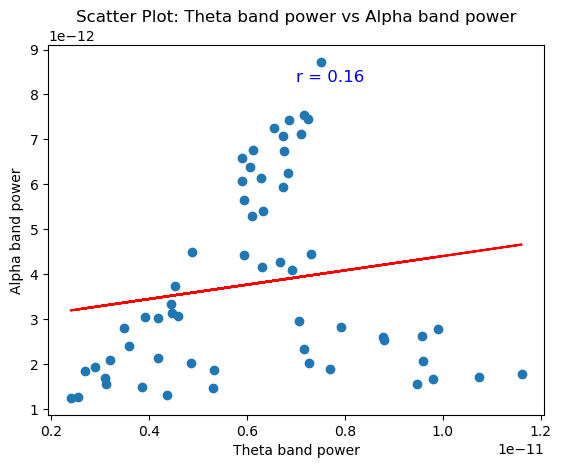

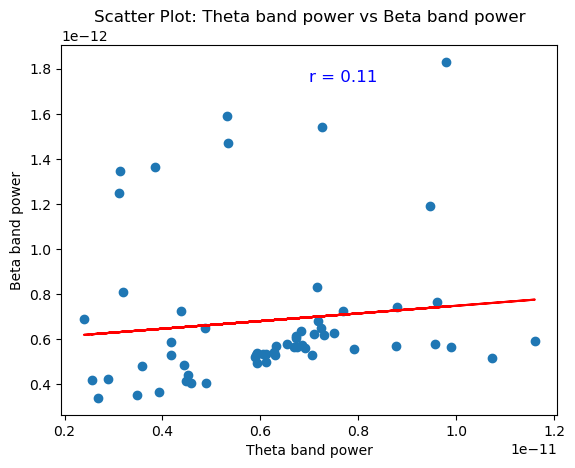

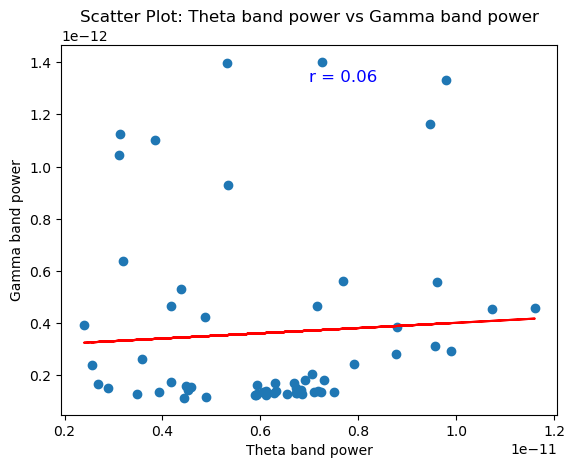

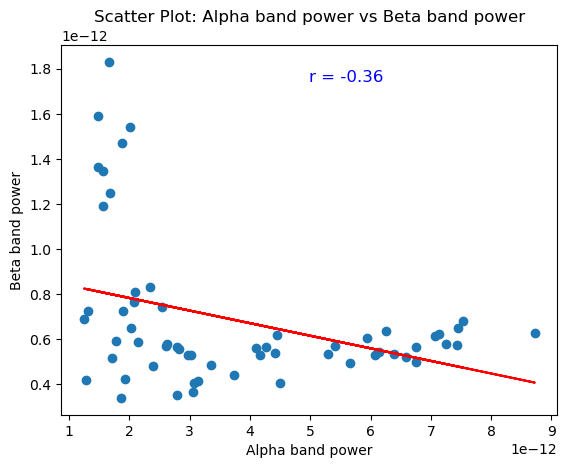

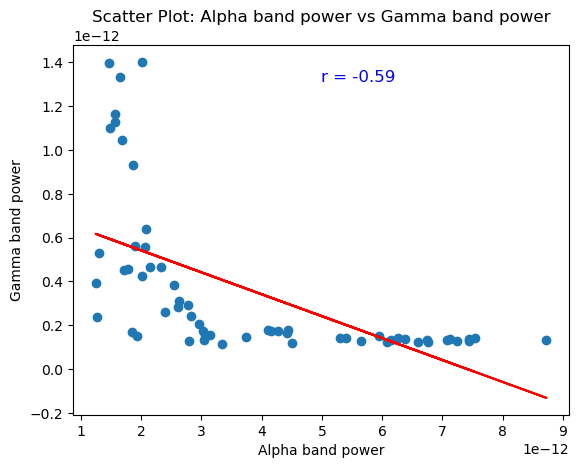

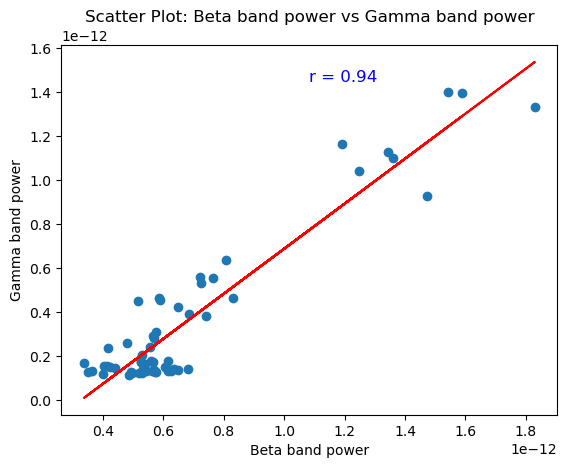

In [22]:
series_list = [theta_series, alpha_series, beta_series, gamma_series]
series_names = ['Theta band power', 'Alpha band power', 'Beta band power', 'Gamma band power']

for i in range(len(series_list)):
    for j in range(i + 1, len(series_list)):
        s1 = series_list[i]
        s2 = series_list[j]
        
        r_value = s1.corr(s2)

        plt.scatter(s1, s2)

        slope, intercept = np.polyfit(s1, s2, 1)
        plt.plot(s1, slope * s1 + intercept, color='red')

        plt.text(0.5, 0.9, f'r = {r_value:.2f}', fontsize=12, transform=plt.gca().transAxes, color='blue')

        plt.xlabel(series_names[i])
        plt.ylabel(series_names[j])
        plt.title(f'Scatter Plot: {series_names[i]} vs {series_names[j]}')

        plt.show()

In [23]:
#Number of events is 320, which equals number of epochs

In [24]:
events = mne.find_events(raw)

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


In [25]:
epochs = mne.Epochs(raw_selected, events)

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 320 events and 421 original time points ...
0 bad epochs dropped
Loading data for 20 events and 421 original time points ...


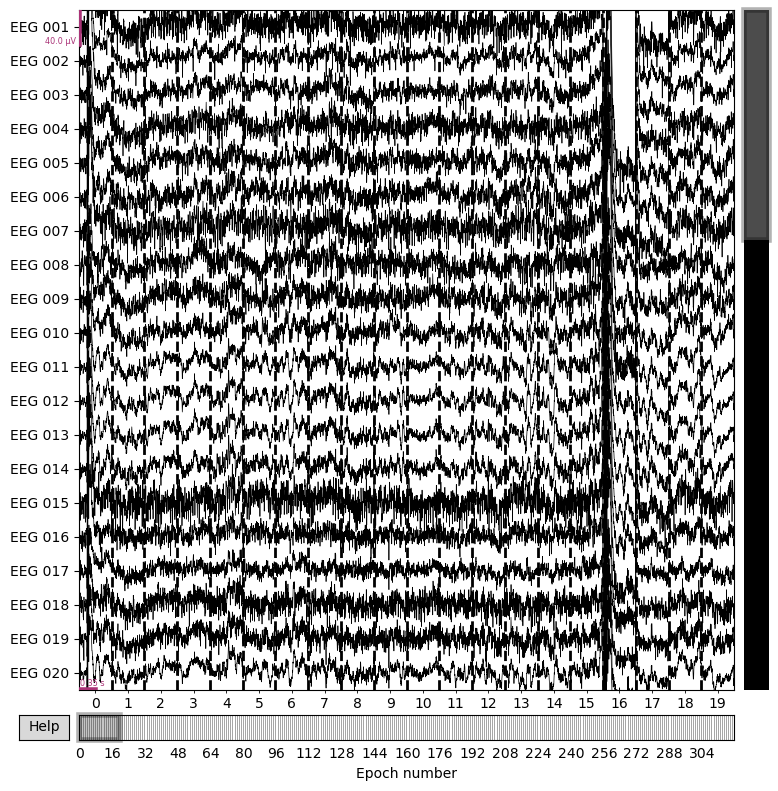

In [26]:
epochs.plot();

In [81]:
#Creation of Spectral Connectivity Objects
coh = spectral_connectivity_epochs(epochs)

Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1711 connections
    using t=-0.200s..0.499s for estimation (421 points)
    frequencies: 7.1Hz..299.6Hz (206 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    computing cross-spectral density for epoch 11
    computing cross-spectral density for epoch 12
    computing cross-spectra

    computing cross-spectral density for epoch 157
    computing cross-spectral density for epoch 158
    computing cross-spectral density for epoch 159
    computing cross-spectral density for epoch 160
    computing cross-spectral density for epoch 161
    computing cross-spectral density for epoch 162
    computing cross-spectral density for epoch 163
    computing cross-spectral density for epoch 164
    computing cross-spectral density for epoch 165
    computing cross-spectral density for epoch 166
    computing cross-spectral density for epoch 167
    computing cross-spectral density for epoch 168
    computing cross-spectral density for epoch 169
    computing cross-spectral density for epoch 170
    computing cross-spectral density for epoch 171
    computing cross-spectral density for epoch 172
    computing cross-spectral density for epoch 173
    computing cross-spectral density for epoch 174
    computing cross-spectral density for epoch 175
    computing cross-spectral de

    computing cross-spectral density for epoch 318
    computing cross-spectral density for epoch 319
    computing cross-spectral density for epoch 320
    assembling connectivity matrix
[Connectivity computation done]


In [72]:
pli = spectral_connectivity_epochs(epochs, method="pli")

Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1711 connections
    using t=-0.200s..0.499s for estimation (421 points)
    frequencies: 7.1Hz..299.6Hz (206 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    computing cross-spectral density for epoch 11
    computing cross-spectral density for epoch 12
    computing cross-spectral dens

    computing cross-spectral density for epoch 157
    computing cross-spectral density for epoch 158
    computing cross-spectral density for epoch 159
    computing cross-spectral density for epoch 160
    computing cross-spectral density for epoch 161
    computing cross-spectral density for epoch 162
    computing cross-spectral density for epoch 163
    computing cross-spectral density for epoch 164
    computing cross-spectral density for epoch 165
    computing cross-spectral density for epoch 166
    computing cross-spectral density for epoch 167
    computing cross-spectral density for epoch 168
    computing cross-spectral density for epoch 169
    computing cross-spectral density for epoch 170
    computing cross-spectral density for epoch 171
    computing cross-spectral density for epoch 172
    computing cross-spectral density for epoch 173
    computing cross-spectral density for epoch 174
    computing cross-spectral density for epoch 175
    computing cross-spectral de

    computing cross-spectral density for epoch 318
    computing cross-spectral density for epoch 319
    computing cross-spectral density for epoch 320
    assembling connectivity matrix
[Connectivity computation done]


In [73]:
plv = spectral_connectivity_epochs(epochs, method = "plv")

Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1711 connections
    using t=-0.200s..0.499s for estimation (421 points)
    frequencies: 7.1Hz..299.6Hz (206 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLV
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    computing cross-spectral density for epoch 11
    computing cross-spectral density for epoch 12
    computing cross-spectral dens

    computing cross-spectral density for epoch 157
    computing cross-spectral density for epoch 158
    computing cross-spectral density for epoch 159
    computing cross-spectral density for epoch 160
    computing cross-spectral density for epoch 161
    computing cross-spectral density for epoch 162
    computing cross-spectral density for epoch 163
    computing cross-spectral density for epoch 164
    computing cross-spectral density for epoch 165
    computing cross-spectral density for epoch 166
    computing cross-spectral density for epoch 167
    computing cross-spectral density for epoch 168
    computing cross-spectral density for epoch 169
    computing cross-spectral density for epoch 170
    computing cross-spectral density for epoch 171
    computing cross-spectral density for epoch 172
    computing cross-spectral density for epoch 173
    computing cross-spectral density for epoch 174
    computing cross-spectral density for epoch 175
    computing cross-spectral de

    computing cross-spectral density for epoch 318
    computing cross-spectral density for epoch 319
    computing cross-spectral density for epoch 320
    assembling connectivity matrix
[Connectivity computation done]


In [76]:
#gc = spectral_connectivity_epochs(epochs, method = "gc")
#All to all connectivity is not supported for Granger Causality

In [75]:
imcoh = spectral_connectivity_epochs(epochs, method="imcoh")

Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1711 connections
    using t=-0.200s..0.499s for estimation (421 points)
    frequencies: 7.1Hz..299.6Hz (206 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Imaginary Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    computing cross-spectral density for epoch 11
    computing cross-spectral density for epoch 12
    computing cro

    computing cross-spectral density for epoch 157
    computing cross-spectral density for epoch 158
    computing cross-spectral density for epoch 159
    computing cross-spectral density for epoch 160
    computing cross-spectral density for epoch 161
    computing cross-spectral density for epoch 162
    computing cross-spectral density for epoch 163
    computing cross-spectral density for epoch 164
    computing cross-spectral density for epoch 165
    computing cross-spectral density for epoch 166
    computing cross-spectral density for epoch 167
    computing cross-spectral density for epoch 168
    computing cross-spectral density for epoch 169
    computing cross-spectral density for epoch 170
    computing cross-spectral density for epoch 171
    computing cross-spectral density for epoch 172
    computing cross-spectral density for epoch 173
    computing cross-spectral density for epoch 174
    computing cross-spectral density for epoch 175
    computing cross-spectral de

    computing cross-spectral density for epoch 318
    computing cross-spectral density for epoch 319
    computing cross-spectral density for epoch 320
    assembling connectivity matrix
[Connectivity computation done]


In [93]:
#Creation of matrices
coh_matrix = coh.get_data(output = "dense")[:, :, 0]
pli_matrix = pli.get_data(output = "dense")[:, :, 0]
plv_matrix = plv.get_data(output = "dense")[:, :, 0]
imcoh_matrix = imcoh.get_data(output = "dense")[:, :, 0]
matrices_list = [coh_matrix, pli_matrix, plv_matrix, imcoh_matrix]
matrices_names = ["Coherence", "Phase Lag Index", "Phase-Locking Value", "Imaginary Part of Coherence"]

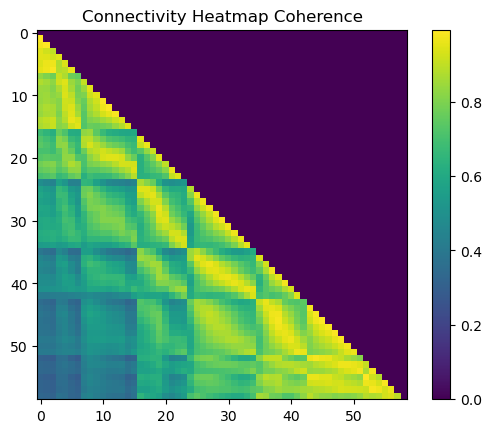

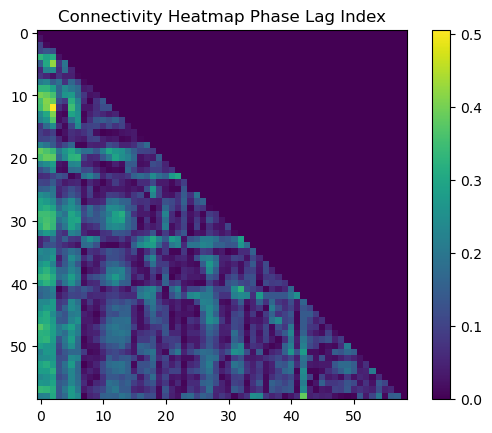

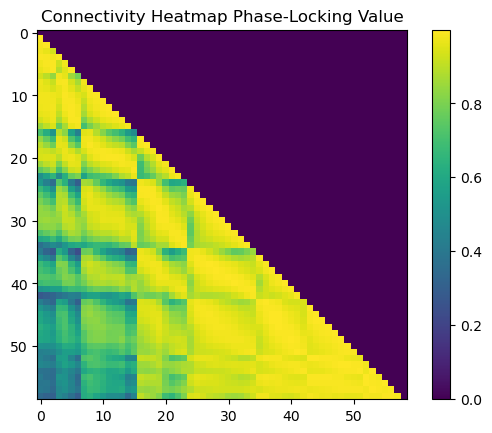

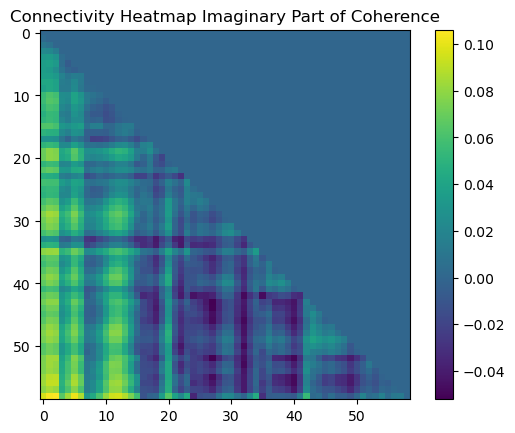

In [94]:
for i in range(len(matrices_list)):
    plt.imshow(matrices_list[i], cmap="viridis", interpolation="none")
    plt.xlabel =("Channels")
    plt.ylabel =("Channels")
    plt.title(f"Connectivity Heatmap {matrices_names[i]}")
    plt.colorbar()
    plt.show()

In [98]:
plot_sensors_connectivity(epochs.info, imcoh_matrix)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`


In [99]:
plot_sensors_connectivity(epochs.info, pli_matrix)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
